In [1]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
project_root = Path.cwd().parent.parent  # Assuming notebook is in experiments/notebooks/
sys.path.insert(0, str(project_root))
print(sys.path)
import pandas as pd
import matplotlib.pyplot as plt
from experiments.analysis_utils.data_processing import read_directory
from experiments.analysis_utils.visualization import plot_reaction_speed_distribution, plot_token_distribution

['/home/rotsker/PycharmProjects/dg-research-revision', '/home/rotsker/miniconda3/envs/radCAD/lib/python312.zip', '/home/rotsker/miniconda3/envs/radCAD/lib/python3.12', '/home/rotsker/miniconda3/envs/radCAD/lib/python3.12/lib-dynload', '', '/home/rotsker/miniconda3/envs/radCAD/lib/python3.12/site-packages']


In [2]:
# Read the data
path_to_runs = Path("../../results/simulations/withdrawal_queue_replacement/")
# path_to_runs = Path("../../results/simulations/model_validation/")
print(path_to_runs.resolve())
print(path_to_runs.resolve().exists())
proposal_df_full, start_data_df_full, timestep_data_df_full = read_directory(path_to_runs.resolve())

# Optional: save the plot
# plt.savefig('reaction_speed_distribution.png', bbox_inches='tight')

/home/rotsker/PycharmProjects/dg-research-revision/results/simulations/withdrawal_queue_replacement
True


In [3]:
from experiments.analysis_utils.metrics import calculate_time_to_first_veto
veto_times = calculate_time_to_first_veto(timestep_data_df_full)

# Basic statistics
print("Time to first veto statistics:")
print(f"Runs with vetoes: {veto_times['time_to_first_veto'].notna().sum()}")
print(f"Runs without vetoes: {veto_times['time_to_first_veto'].isna().sum()}")
print(f"\nFor runs with vetoes:")
print(f"Mean time to first veto: {veto_times['time_to_first_veto'].mean():.2f}")
print(f"Median time to first veto: {veto_times['time_to_first_veto'].median():.2f}")

# With seal parameters
veto_times_with_params = veto_times.merge(
    start_data_df_full[['run_id', 'first_seal_rage_quit_support', 'second_seal_rage_quit_support']], 
    on='run_id'
)

Time to first veto statistics:
Runs with vetoes: 1968
Runs without vetoes: 1022

For runs with vetoes:
Mean time to first veto: 29.01
Median time to first veto: 28.00


In [10]:
timestep_data_df_full_with_first_veto = timestep_data_df_full.merge(
    veto_times_with_params[['run_id', 'time_to_first_veto']], on='run_id', how='left')

pre_veto_states = timestep_data_df_full_with_first_veto[
    timestep_data_df_full_with_first_veto['timestep'] == 
    timestep_data_df_full_with_first_veto['time_to_first_veto'] - 1
]

# Display the results
pre_veto_states

,timestep,simulation_hash,dg_state_value,dg_state_name,dg_rage_quit_support,dg_dynamic_timelock_seconds,actors_total_balance,actors_total_locked,actors_total_number,actors_total_number_locked,...,recovery_CoordinatedDefender,actors_locked_CoordinatedDefender,actors_affected_CoordinatedDefender,actors_quit_CoordinatedDefender,quit_CoordinatedDefender,actors_total_balance_relative,actors_total_locked_relative,actors_total_health_relative,run_id,time_to_first_veto
21,22,45fac8345bc279635e2b89324198185de5e88f8fe5f9be...,1,Normal,9335046164347450,0,8.912435e+06,83981.966307,1986,108,...,0,0,0,0,0.0,0.990665,0.009335,1.0,0,23.0
271,32,8657caa4095c1f115572f29665258275abf8f48c3ee6d5...,1,Normal,19769271261045792,0,8.818564e+06,177852.604447,1986,248,...,0,0,0,0,0.0,0.980231,0.019769,1.0,1,33.0
503,24,9938ea254f696d888dccceec4a02487d7b05218cb629f2...,1,Normal,9698556329433796,0,8.909165e+06,87252.255270,1986,119,...,0,0,0,0,0.0,0.990301,0.009699,1.0,2,25.0
1462,23,afecd43d5a7f8c131bd37adc1bbc3e9f856760d6ff59b5...,1,Normal,9546993296365300,0,8.910528e+06,85888.731050,1986,123,...,0,0,0,0,0.0,0.990453,0.009547,1.0,6,24.0
1955,36,62fd7ec1876aab8ab486ea30f43ec4ffab40dc4f5ce423...,1,Normal,19992364845169176,0,8.816557e+06,179859.647319,1986,238,...,0,0,0,0,0.0,0.980008,0.019992,1.0,8,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716423,24,1478f3202618a1ca451fdf1dfbcdaee050cc8d872ebe5e...,1,Normal,10479273211404672,0,8.902141e+06,94275.909756,1986,131,...,0,0,0,0,0.0,0.989521,0.010479,1.0,2985,25.0
716668,29,c09820071cdc20d80e8387d9e625715869ab98d76457cf...,1,Normal,14624198275644556,0,8.864851e+06,131565.383312,1986,200,...,0,0,0,0,0.0,0.985376,0.014624,1.0,2986,30.0
716906,27,be5011fef547a816805badae821a450bd0e1b67af81094...,1,Normal,14597618244014698,0,8.865091e+06,131326.258269,1986,184,...,0,0,0,0,0.0,0.985402,0.014598,1.0,2987,28.0
717145,26,fd2cbadf61217d5f4e47a8386a1184788ee31477e457a4...,1,Normal,11804205914106970,0,8.890221e+06,106195.556605,1986,160,...,0,0,0,0,0.0,0.988196,0.011804,1.0,2988,27.0


In [21]:
from experiments.analysis_utils.metrics import calculate_pre_first_veto_stats
pre_first_veto_stats = calculate_pre_first_veto_stats(timestep_data_df_full, start_data_df_full)
pre_first_veto_stats

,,actors_locked_Slow_mean,actors_locked_Slow_median,actors_locked_Slow_std,actors_locked_Normal_mean,actors_locked_Normal_median,actors_locked_Normal_std,actors_locked_Quick_mean,actors_locked_Quick_median,actors_locked_Quick_std
first_seal_rage_quit_support,second_seal_rage_quit_support,,,,,,,,,
0.0100,0.1,0.0,0.0,0.0,89.428000,90.0,13.331326,35.872000,36.0,5.690728
0.0125,0.1,0.0,0.0,0.0,123.498000,124.0,15.156829,35.872000,36.0,5.690728
0.0150,0.1,0.0,0.0,0.0,158.674089,159.0,15.472709,35.866397,36.0,5.707755
0.0175,0.1,0.0,0.0,0.0,189.887435,190.0,14.426223,36.170157,36.0,5.874439
0.0200,0.1,0.0,0.0,0.0,210.619565,211.0,12.435188,38.706522,39.0,5.202573


/home/rotsker/PycharmProjects/dg-research-revision/experiments/analysis_utils/visualization.py:236: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


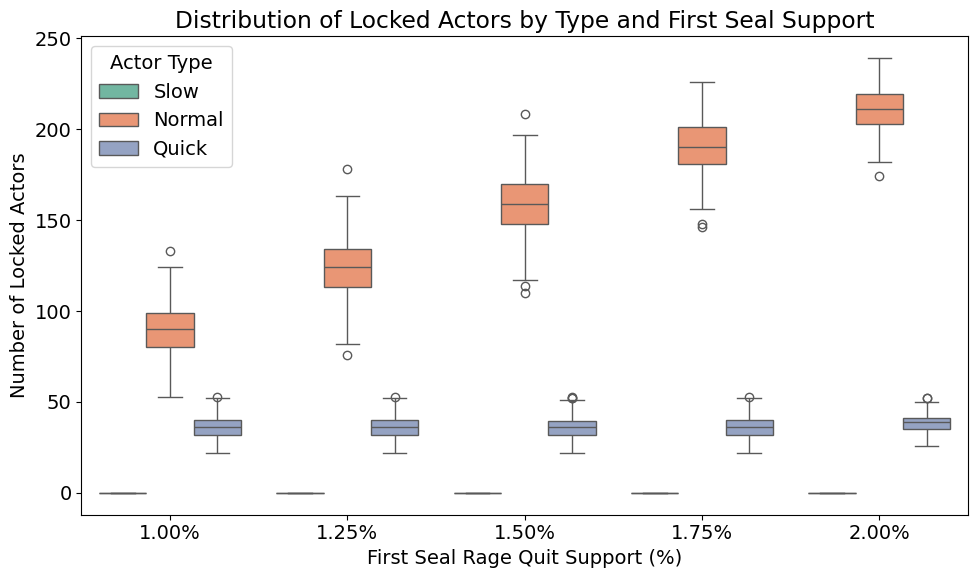

In [38]:
from experiments.analysis_utils.visualization import plot_pre_veto_locked_by_reaction_time_distributions
plot_pre_veto_locked_by_reaction_time_distributions(timestep_data_df_full, start_data_df_full)



/home/rotsker/PycharmProjects/dg-research-revision/experiments/analysis_utils/visualization.py:245: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


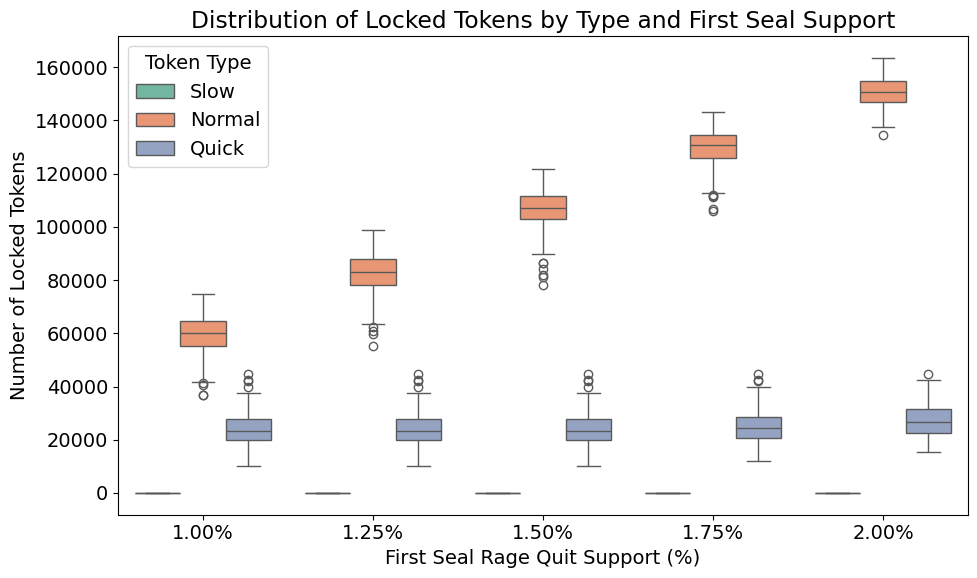

In [41]:
from experiments.analysis_utils.visualization import plot_pre_veto_locked_by_reaction_time_distributions
plot_pre_veto_locked_by_reaction_time_distributions(timestep_data_df_full, start_data_df_full, plot_token_distribution=True)



In [54]:
from experiments.analysis_utils.metrics import analyze_veto_timing_by_seals

veto_stats = analyze_veto_timing_by_seals(timestep_data_df_full, start_data_df_full)
print("Veto statistics by seal parameters:")
display(veto_stats)

# Example for specific seal values
veto_seal = 0.01
rage_seal = 0.1
specific_stats = veto_stats.loc[veto_seal, rage_seal]
print(f"\nStatistics for veto_seal={veto_seal}, rage_seal={rage_seal}:")
print(f"Veto rate: {specific_stats['veto_rate']:.1f}%")
print(f"Mean time to veto: {specific_stats['mean_time_to_veto']:.2f}")
print(f"Median time to veto: {specific_stats['median_time_to_veto']:.2f}")
print(f"Total runs: {specific_stats['total_runs']}")

veto_stats.to_csv("veto_stats.csv")

Veto statistics by seal parameters:


,,veto_rate,mean_time_to_veto,median_time_to_veto,hours_mean_time_to_veto_hours,hours_median_time_to_veto_hours,total_runs
first_seal_rage_quit_support,second_seal_rage_quit_support,,,,,,
0.0100,0.1,100.000000,24.990215,25.0,74.970646,75.0,511
0.0125,0.1,100.000000,27.188000,27.0,81.564000,81.0,500
0.0150,0.1,98.800000,29.945344,30.0,89.836032,90.0,500
0.0175,0.1,76.400000,33.772251,33.0,101.316754,99.0,500
0.0200,0.1,18.585859,36.000000,36.0,108.000000,108.0,495
0.0300,0.1,0.000000,NaN,NaN,NaN,NaN,495



Statistics for veto_seal=0.01, rage_seal=0.1:
Veto rate: 100.0%
Mean time to veto: 24.99
Median time to veto: 25.00
Total runs: 511.0


In [41]:
from experiments.analysis_utils.metrics import calculate_proposal_stats_by_seals
stats_by_seals = calculate_proposal_stats_by_seals(proposal_df_full, start_data_df_full)
print("Proposal statistics by seal parameters:")
display(stats_by_seals)

# Example for specific seal values
veto_seal = 0.01
rage_seal = 0.1
specific_stats = stats_by_seals.loc[veto_seal, rage_seal]
print(f"\nStatistics for veto_seal={veto_seal}, rage_seal={rage_seal}:")
print(f"Total proposals: {specific_stats['total_proposals']}")
for status, percentage in specific_stats.items():
    if status != 'total_proposals':
        print(f"{status}: {percentage:.1f}%")

Proposal statistics by seal parameters:


,,total_proposals,Cancelled,Executed
first_seal_rage_quit_support,second_seal_rage_quit_support,,,
0.0100,0.1,533,100.000000,0.000000
0.0125,0.1,500,100.000000,0.000000
0.0150,0.1,500,98.800000,1.200000
0.0175,0.1,500,76.400000,23.600000
0.0200,0.1,495,18.585859,81.414141
0.0300,0.1,495,0.000000,100.000000



Statistics for veto_seal=0.01, rage_seal=0.1:
Total proposals: 533.0
Cancelled: 100.0%
Executed: 0.0%


<Axes: title={'center': 'Actors reaction speed'}>

<Figure size 1000x800 with 0 Axes>

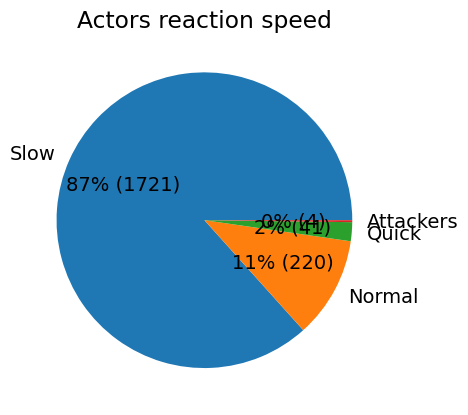

In [42]:
# Get data for a single run (using first run as example)
run_id = start_data_df_full['run_id'].iloc[0]

# Create the plot
plt.figure(figsize=(10, 8))
plot_reaction_speed_distribution(start_data_df_full, run_id=run_id)
# plt.show()

<Axes: title={'center': 'Tokens by reaction speed'}>

<Figure size 1000x800 with 0 Axes>

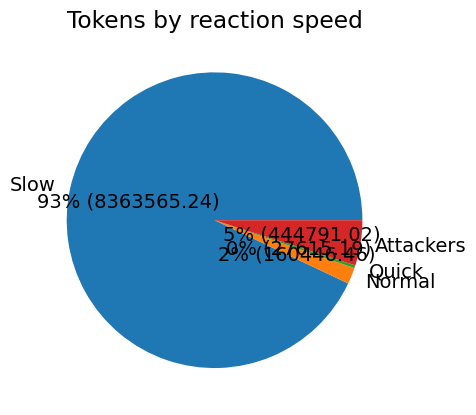

In [43]:
plt.figure(figsize=(10, 8))
plot_token_distribution(timestep_data_df_full, run_id=run_id)